# Laboratory practice № 11 ($H_2$ & $H_{\infin}$)

Variant: 9

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp
import slycot

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

color = ["#031B88", "#FB7B8E", "#AAB6FB", "#8A2BE2"]
sns.set_palette(color)

In [3]:
import sympy
omega_i = sympy.Symbol("omega",real=True) * sympy.I

def get_fraction(num, den):
    den_ = sum((0 if abs(co) < 10**-3 else co)*omega_i**i for i, co in enumerate(reversed(den)))
    num_ = sum((0 if abs(co) < 10**-3 else co)*omega_i**i for i, co in enumerate(reversed(num)))
    return num_/den_

def get_singular(sys_for_an_tf):
    mat_ = sympy.Matrix([
        [get_fraction(sys_for_an_tf[0,0].num[0][0],sys_for_an_tf[0,0].den[0][0]), get_fraction(sys_for_an_tf[0,1].num[0][0],sys_for_an_tf[0,1].den[0][0]), get_fraction(sys_for_an_tf[0,2].num[0][0],sys_for_an_tf[0,2].den[0][0])],
        [get_fraction(sys_for_an_tf[1,0].num[0][0],sys_for_an_tf[1,0].den[0][0]), get_fraction(sys_for_an_tf[1,1].num[0][0],sys_for_an_tf[1,1].den[0][0]), get_fraction(sys_for_an_tf[1,2].num[0][0],sys_for_an_tf[1,2].den[0][0])]
    ])
    sing = sympy.Matrix(sympy.Abs(mat_).singular_values()).T
    sing.simplify() 
    return sing

## Task 1

$x = \begin{bmatrix}a \\ v\end{bmatrix}$

$\dot{x} = \begin{bmatrix}0 & 1 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ \frac{1}{M}\end{bmatrix}u + \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$y = \begin{bmatrix}1 &  0\end{bmatrix}x + \begin{bmatrix}0 & 0 & 1\end{bmatrix}\begin{bmatrix}f_1 \\ f_2 \\ \xi\end{bmatrix}$

$z = \begin{bmatrix}2 & 0 \\ 0 & 0\end{bmatrix}x + \begin{bmatrix}0 \\ 1 \end{bmatrix}u$

### Subtask 1

In [4]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [1, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [5]:
def generate_LQR(a,b,q,r):
    k, p, _ = ctrl.lqr(a,b,q,r)
    return k, p

In [6]:
K_1_1, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
K_1_1

array([[1.        , 1.41421356]])

In [7]:

np.linalg.eigvals(A-B_2@K_1_1)

array([-0.70710678+0.70710678j, -0.70710678-0.70710678j])

In [8]:
sys_for_an = ctrl.ss(A-B_2@K_1_1,B_1,C_2-D_2@K_1_1,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an)
sys_for_an_tf

TransferFunction([[array([1.        , 1.41421356]), array([1.]), array([0.])], [array([-1.00000000e+00,  2.77555756e-16]), array([-1.41421356, -1.        ]), array([0.])]], [[array([1.        , 1.41421356, 1.        ]), array([1.        , 1.41421356, 1.        ]), array([1.])], [array([1.        , 1.41421356, 1.        ]), array([1.        , 1.41421356, 1.        ]), array([1.])]])

In [9]:
time_1 = np.linspace(0,30,int(30/0.005))

In [10]:
time_1 = np.linspace(0,30,int(30/0.005))
w = np.vstack([
    np.sin(time_1*0.5),
    np.sin(time_1*0.8),
    np.sin(time_1*0.2),
])
z = ctrl.forced_response(sys_for_an,time_1,X0=np.ones((2,1))*10,U=w)

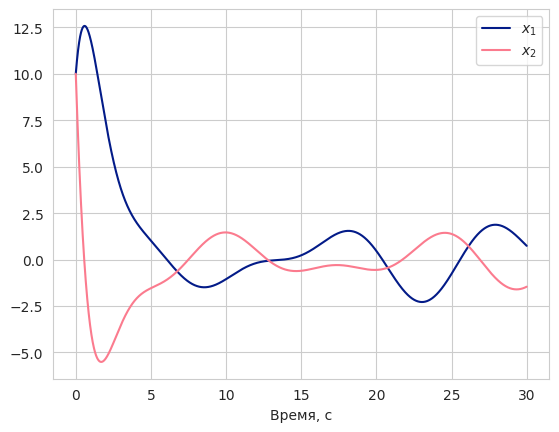

In [11]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
plt.xlabel("Время, с")
plt.legend()

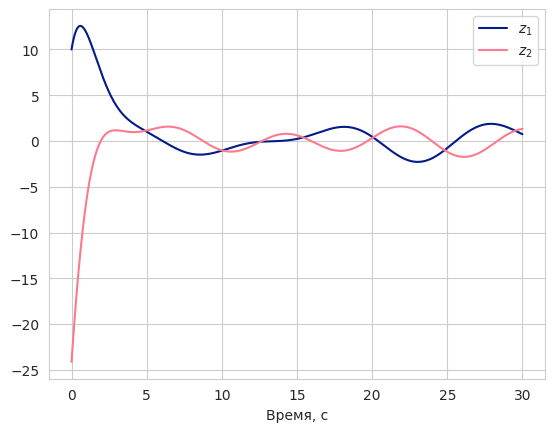

In [12]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
plt.xlabel("Время, с")
plt.legend()

In [13]:
g_o = ctrl.gram(sys_for_an,"o")
g_o

array([[1.41421356, 1.        ],
       [1.        , 1.41421356]])

h_2 norm

In [14]:
np.sqrt(np.trace(B_1.T@g_o@B_1))

1.6817928305074294

In [15]:
sys_for_an

StateSpace(array([[ 0.        ,  1.        ],
       [-1.        , -1.41421356]]), array([[1., 0., 0.],
       [0., 1., 0.]]), array([[ 1.        ,  0.        ],
       [-1.        , -1.41421356]]), array([[0., 0., 0.],
       [0., 0., 0.]]))

mfc

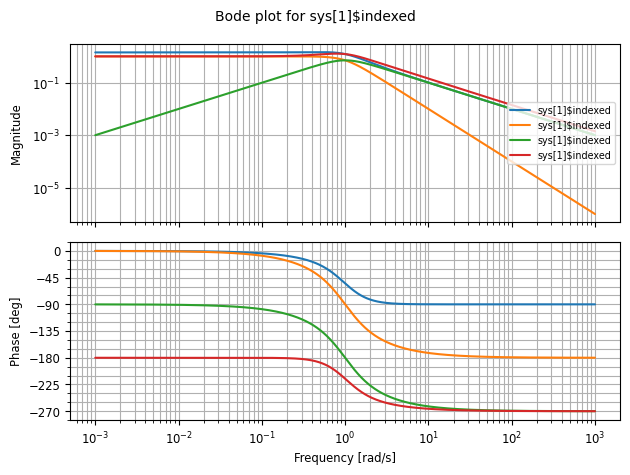

In [16]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [17]:
sys_for_an_tf

TransferFunction([[array([1.        , 1.41421356]), array([1.]), array([0.])], [array([-1.00000000e+00,  2.77555756e-16]), array([-1.41421356, -1.        ]), array([0.])]], [[array([1.        , 1.41421356, 1.        ]), array([1.        , 1.41421356, 1.        ]), array([1.])], [array([1.        , 1.41421356, 1.        ]), array([1.        , 1.41421356, 1.        ]), array([1.])]])

svd

In [18]:
sing = get_singular(sys_for_an_tf)

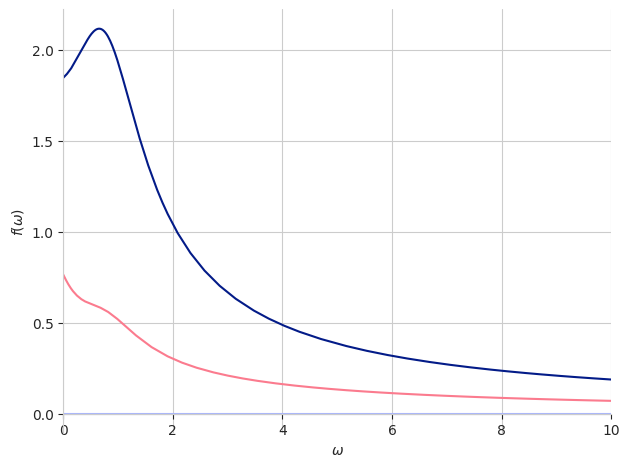

In [19]:
import sympy.plotting


p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

### Subtask 2

In [20]:
C_2 = np.array([
    [1, 0],
    [0, 1]
])

D_2 = np.array([
    [1],
    [0]
])

In [21]:
import scipy.linalg


def generate_H2(a,b_2,c_2,d_2):
    q = scipy.linalg.solve_continuous_are(a,b_2,c_2.T@c_2,d_2.T@d_2)
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [22]:
K_2 = generate_H2(A,B_2,C_2,D_2)
K_2

array([[-1.        , -1.73205081]])

In [23]:
np.linalg.eigvals(A+B_2@K_2)

array([-0.8660254+0.5j, -0.8660254-0.5j])

In [24]:
sys_for_an_1 = ctrl.ss(A+B_2@K_2,B_1,C_2+D_2@K_2,np.zeros((2,3)))
sys_for_an_tf = ctrl.ss2tf(sys_for_an_1)
sys_for_an_tf

TransferFunction([[array([3.84592537e-16, 1.73205081e+00]), array([-1.73205081e+00,  3.84592537e-16]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1.        , 1.73205081, 1.        ]), array([1.        , 1.73205081, 1.        ]), array([1.])], [array([1.        , 1.73205081, 1.        ]), array([1.        , 1.73205081, 1.        ]), array([1.])]])

In [25]:
z = ctrl.forced_response(sys_for_an_1,time_1,X0=np.ones((2,1))*10,U=w)

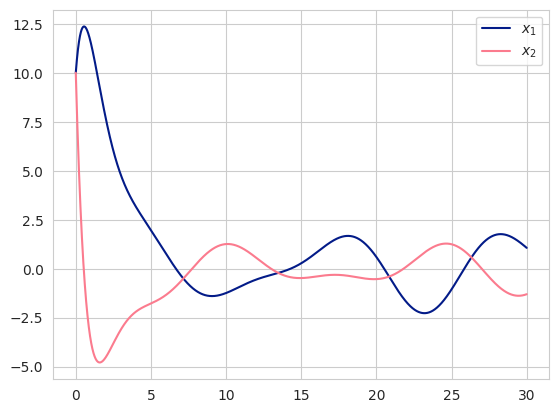

In [26]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
# plt.grid()
plt.legend()

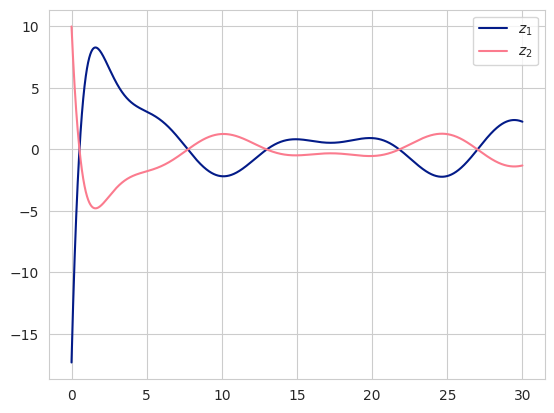

In [27]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
# plt.grid()
plt.legend()

In [28]:
g_o = ctrl.gram(sys_for_an_1,"o")
g_o

array([[ 1.15470054e+00, -1.21460805e-16],
       [-1.21460805e-16,  1.15470054e+00]])

H_2 norm

In [29]:
g_o = ctrl.gram(sys_for_an_1,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

1.519671371303185

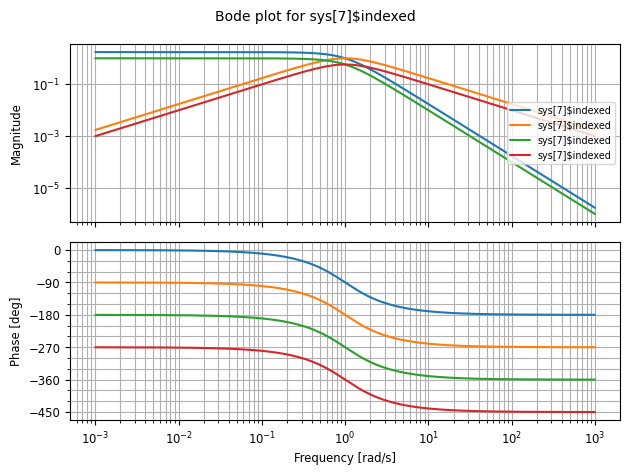

In [30]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [31]:
sys_for_an_tf

TransferFunction([[array([3.84592537e-16, 1.73205081e+00]), array([-1.73205081e+00,  3.84592537e-16]), array([0.])], [array([-1.]), array([1., 0.]), array([0.])]], [[array([1.        , 1.73205081, 1.        ]), array([1.        , 1.73205081, 1.        ]), array([1.])], [array([1.        , 1.73205081, 1.        ]), array([1.        , 1.73205081, 1.        ]), array([1.])]])

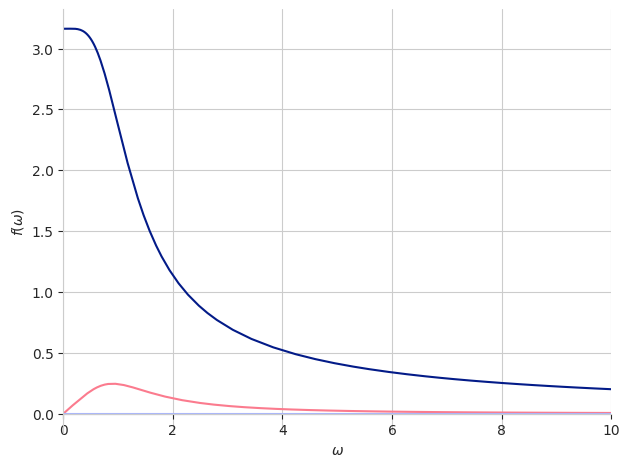

In [32]:
mat_ = sympy.Matrix([
    [3/(omega_i**2 + 1.5*omega_i + 1), get_fraction(sys_for_an_tf[0,1].num[0][0],sys_for_an_tf[0,1].den[0][0]), get_fraction(sys_for_an_tf[0,2].num[0][0],sys_for_an_tf[0,2].den[0][0])],
    [get_fraction(sys_for_an_tf[1,0].num[0][0],sys_for_an_tf[1,0].den[0][0]), get_fraction(sys_for_an_tf[1,1].num[0][0],sys_for_an_tf[1,1].den[0][0]), get_fraction(sys_for_an_tf[1,2].num[0][0],sys_for_an_tf[1,2].den[0][0])]
])
sing = sympy.Matrix(sympy.Abs(mat_).singular_values()).T
sing.simplify() 
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

## Task 2

In [33]:
def generate_H2_obs(a,b_1,c_1,d_1):
    p = scipy.linalg.solve_continuous_are(a.T,c_1.T,b_1@b_1.T,d_1@d_1.T)
    return -p@ c_1.T @np.linalg.inv(d_1@d_1.T)

### Subtask 1

In [34]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [1, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [35]:
K_2_1, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
L_2_1 = generate_H2_obs(A,B_1,C_1,D_1)

In [36]:
K_2_1 = -K_2_1
K_2_1

array([[-1.        , -1.41421356]])

In [37]:
L_2_1 

array([[-1.73205081],
       [-1.        ]])

In [38]:
A_new = np.block([
    [A + B_2@K_2_1, -B_2@K_2_1],
    [np.zeros_like(A), A + L_2_1@C_1]
]) 
B_new = np.block([
    [B_1],
    [L_2_1@D_1+B_1]
]) 
C_new = np.block([
    # [C_1, np.zeros_like(C_1)],
    # [C_1, -C_1],
    [C_2+D_2@K_2_1, -D_2@K_2_1],
    # [C_2+D_2@K_2_1, -C_2-D_2@K_2_1]
]) 
D_new = np.block([
    # [D_1],
    # [np.zeros_like(D_1)],
    [np.zeros((C_2.shape[0],D_1.shape[1]))],
    # [np.zeros((C_2.shape[0],D_1.shape[1]))]
]) 

In [39]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [40]:
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1),
    np.sin(2*time_1)
])

In [41]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

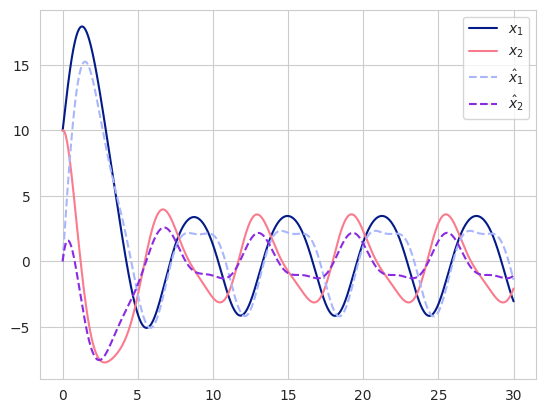

In [42]:
plt.plot(time_1,out.states[0],label="$x_1$")
plt.plot(time_1,out.states[1],label="$x_2$")
plt.plot(time_1,out.states[0]-out.states[2],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1]-out.states[3],linestyle='--',label="$\hat{x}_2$")
plt.legend()

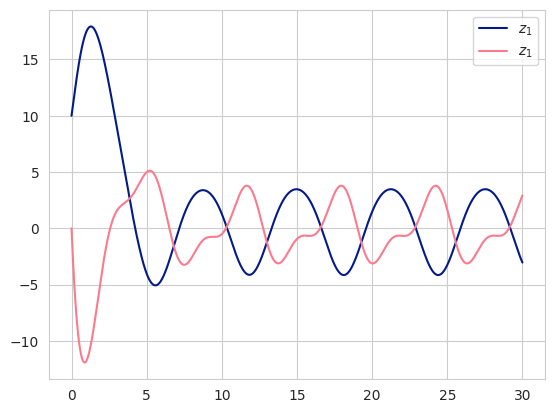

In [43]:
plt.plot(time_1,out.outputs[0],label="$z_1$")
plt.plot(time_1,out.outputs[1],label="$z_1$")
plt.legend()

In [44]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([ 1.00000000e+00,  3.14626437e+00,  4.44948974e+00, -4.44089210e-16]), array([-5.55111512e-17,  1.00000000e+00,  3.14626437e+00,  4.44948974e+00]), array([-5.84841824e-16, -3.14626437e+00, -1.00000000e+00])], [array([-3.14626437e+00, -1.00000000e+00, -3.88578059e-16]), array([-1.35973996e-16, -9.93709438e-16, -3.14626437e+00, -1.00000000e+00]), array([-3.14626437e+00, -1.00000000e+00,  0.00000000e+00, -2.49800181e-16])]], [[array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ]), array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ]), array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ])], [array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ]), array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ]), array([1.        , 3.14626437, 4.44948974, 3.14626437, 1.        ])]])

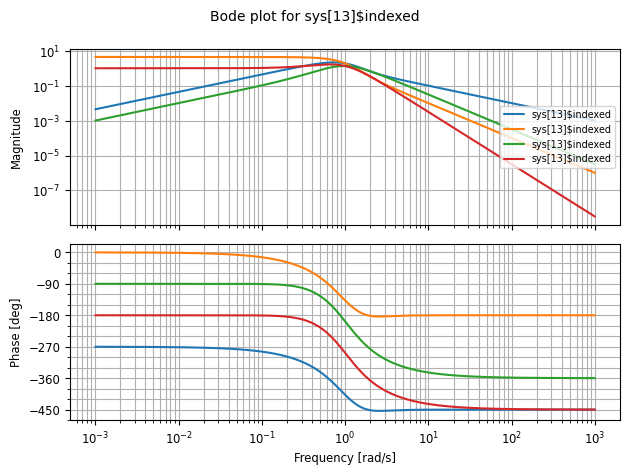

In [45]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

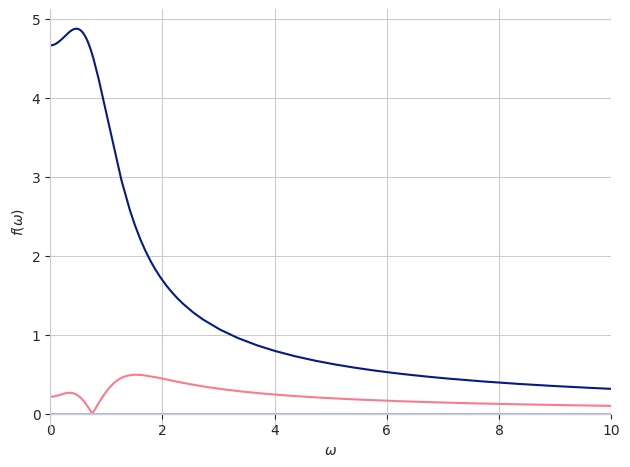

In [46]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [47]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

3.294390182142822

### Subtask 2

In [48]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [1, 0],
    [0, 1]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [1],
    [1]
])

In [49]:
K_2_2, _ = generate_LQR(A,B_2,C_2.T@C_2,D_2.T@D_2)
L_2_2 = generate_H2_obs(A,B_1,C_1,D_1)

In [50]:
K_2_2 = -K_2_2
K_2_2

array([[-0.70710678, -1.38355107]])

In [51]:
np.linalg.eigvals(A+B_2@K_2_2)

array([-0.69177553+0.47807258j, -0.69177553-0.47807258j])

In [52]:
L_2_2 

array([[-1.73205081],
       [-1.        ]])

In [53]:
np.linalg.eigvals(A+L_2_2@C_1)

array([-0.8660254+0.5j, -0.8660254-0.5j])

In [54]:
A_new = np.block([
    [A + B_2@K_2_2, -B_2@K_2_2],
    [np.zeros_like(A), A + L_2_2@C_1]
]) 
B_new = np.block([
    [B_1],
    [L_2_2@D_1+B_1]
]) 
C_new = np.block([
    # [C_1, np.zeros_like(C_1)],
    # [C_1, -C_1],
    [C_2+D_2@K_2_2, -D_2@K_2_2],
    # [C_2+D_2@K_2_1, -C_2-D_2@K_2_1]
]) 
D_new = np.block([
    # [D_1],
    # [np.zeros_like(D_1)],
    [np.zeros((C_2.shape[0],D_1.shape[1]))],
    # [np.zeros((C_2.shape[0],D_1.shape[1]))]
]) 

In [55]:
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [56]:
w = np.vstack([
    np.sin(time_1),
    np.cos(time_1),
    np.sin(2*time_1)
])

In [57]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

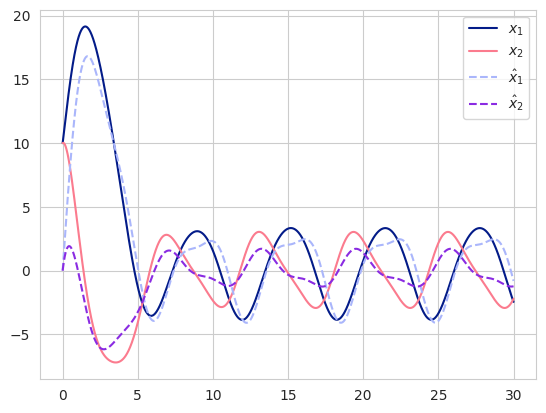

In [58]:
plt.plot(time_1,out.states[0],label="$x_1$")
plt.plot(time_1,out.states[1],label="$x_2$")
plt.plot(time_1,out.states[0]-out.states[2],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1]-out.states[3],linestyle='--',label="$\hat{x}_2$")
plt.legend()

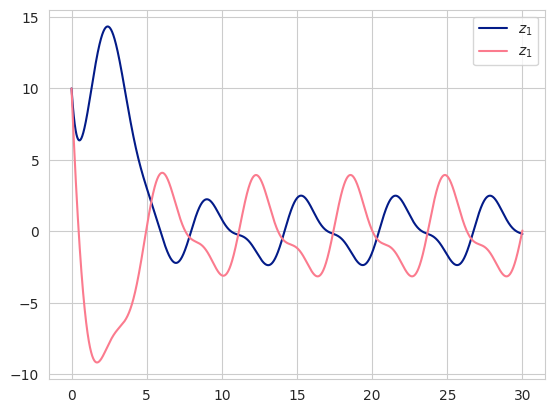

In [59]:
plt.plot(time_1,out.outputs[0],label="$z_1$")
plt.plot(time_1,out.outputs[1],label="$z_1$")
plt.legend()

In [60]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([ 1.00000000e+00,  5.07305936e-01,  3.39638075e+00, -4.85722573e-17]), array([1.16629095e-16, 1.00000000e+00, 5.07305936e-01, 3.39638075e+00]), array([-2.60829594, -0.70710678, -2.60829594, -0.70710678])], [array([-3.88503507e-16, -2.60829594e+00, -3.31540272e+00, -7.07106781e-01]), array([ 1.        ,  3.11560188,  1.49519159, -0.70710678]), array([-2.60829594e+00, -3.31540272e+00, -7.07106781e-01,  7.66747776e-16])]], [[array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678]), array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678]), array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678])], [array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678]), array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678]), array([1.        , 3.11560188, 4.10348753, 2.60829594, 0.70710678])]])

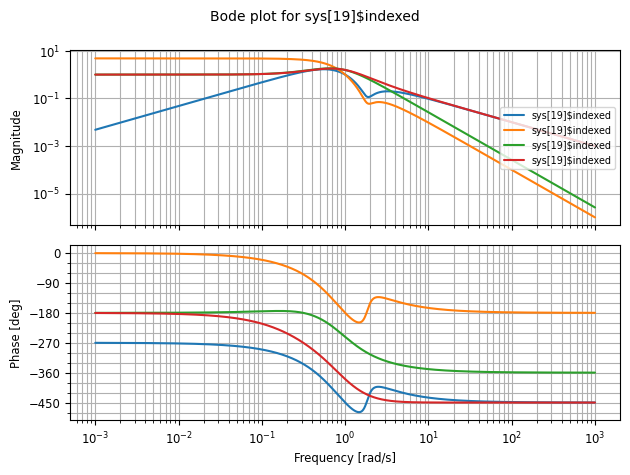

In [61]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

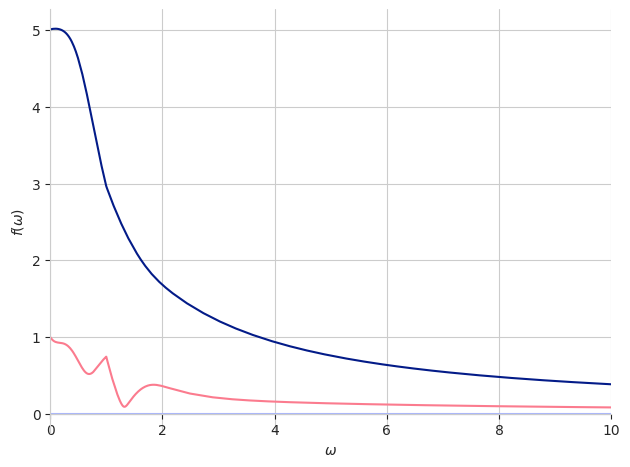

In [62]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [63]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

3.206239328398123

## Task 3

In [64]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [1, 0],
    [0, 0]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [65]:
C_2.T@D_2

array([[0],
       [0]])

In [66]:
def generate_Hinf(a,b_2,c_2,d_2,b_1,gamma):
    R = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    q = scipy.linalg.solve_continuous_are(a,np.identity(R.shape[0]),c_2.T@c_2,np.linalg.inv(R))
    return -np.linalg.inv(d_2.T@d_2)@b_2.T@q

In [129]:
K_3_1 = generate_Hinf(A,B_2,C_2,D_2,B_1,1.2)
K_3_2 = generate_Hinf(A,B_2,C_2,D_2,B_1,5)
K_3_3 = generate_Hinf(A,B_2,C_2,D_2,B_1,10)

In [130]:
K_3_1

array([[-56.34341846, -17.57312533]])

In [131]:
K_3_2

array([[-2.44499443, -3.08374582]])

In [132]:
K_3_3

array([[-2.09449391, -2.88375052]])

In [133]:
np.linalg.eigvals(A+B_2@K_3_1)

array([ -4.21925876, -13.35386657])

In [138]:
np.linalg.eigvals(A+B_2@K_3_2)

array([-1.54187291+0.26004299j, -1.54187291-0.26004299j])

In [139]:
np.linalg.eigvals(A+B_2@K_3_3)

array([-1.44187526+0.12445743j, -1.44187526-0.12445743j])

In [140]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_1,B_1,C_2+D_2@K_3_1,np.zeros((2,3)))
sys_for_an_tf_3_1 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_1

TransferFunction([[array([ 2.        , 35.14625065]), array([2.]), array([0.])], [array([ -56.34341846, -112.68683693]), array([-15.57312533, -56.34341846]), array([0.])]], [[array([ 1.        , 17.57312533, 56.34341846]), array([ 1.        , 17.57312533, 56.34341846]), array([1.])], [array([ 1.        , 17.57312533, 56.34341846]), array([ 1.        , 17.57312533, 56.34341846]), array([1.])]])

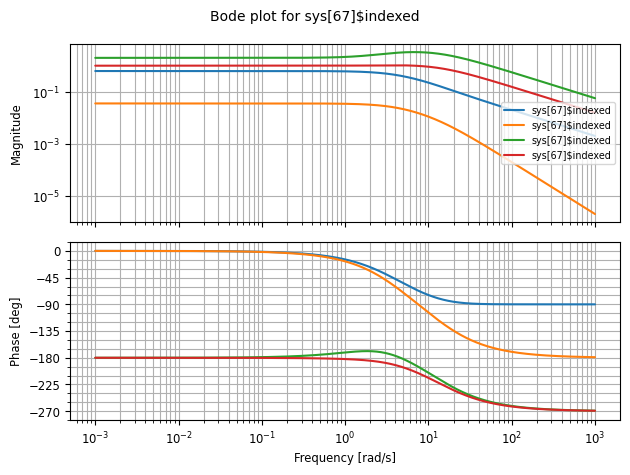

In [141]:
_ = ctrl.bode_plot(sys_for_an_tf_3_1[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_1[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [142]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

10.294679851032967

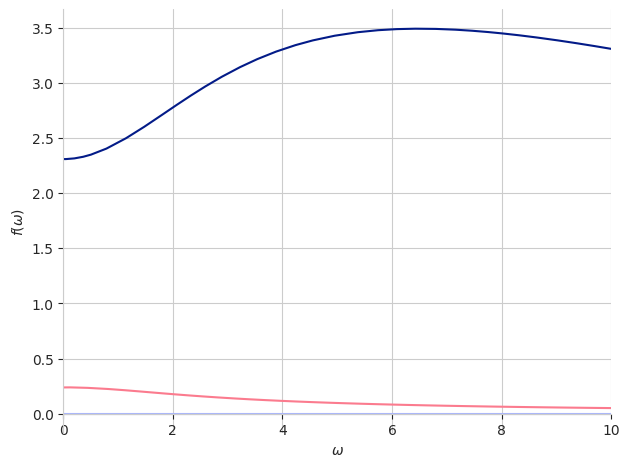

In [143]:
sing = get_singular(sys_for_an_tf_3_1)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [163]:
z = ctrl.forced_response(sys_for_an_3,time_1,X0=np.ones((2,1))*10,U=w)

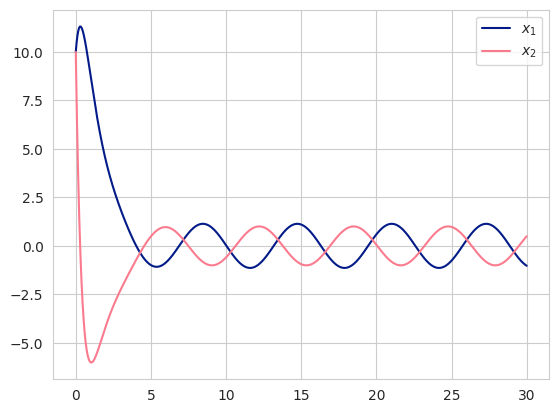

In [164]:
plt.plot(time_1,z.states[0],label="$x_1$")
plt.plot(time_1,z.states[1],label="$x_2$")
# plt.grid()
plt.legend()

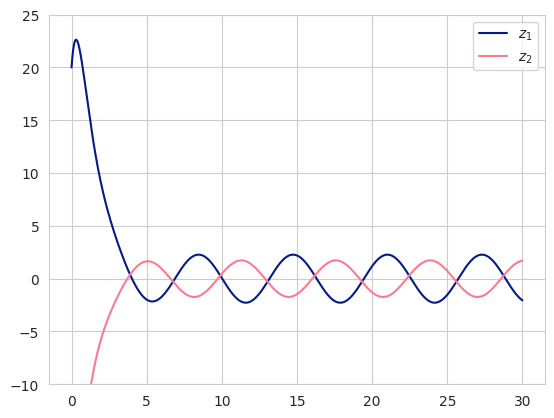

In [165]:
plt.plot(time_1,z.outputs[0],label="$z_1$")
plt.plot(time_1,z.outputs[1],label="$z_2$")
# plt.grid()
plt.ylim([-10,25])
plt.legend()

In [147]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_2,B_1,C_2+D_2@K_3_2,np.zeros((2,3)))
sys_for_an_tf_3_2 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_2

TransferFunction([[array([2.        , 6.16749165]), array([2.]), array([0.])], [array([-2.44499443, -4.88998886]), array([-1.08374582, -2.44499443]), array([0.])]], [[array([1.        , 3.08374582, 2.44499443]), array([1.        , 3.08374582, 2.44499443]), array([1.])], [array([1.        , 3.08374582, 2.44499443]), array([1.        , 3.08374582, 2.44499443]), array([1.])]])

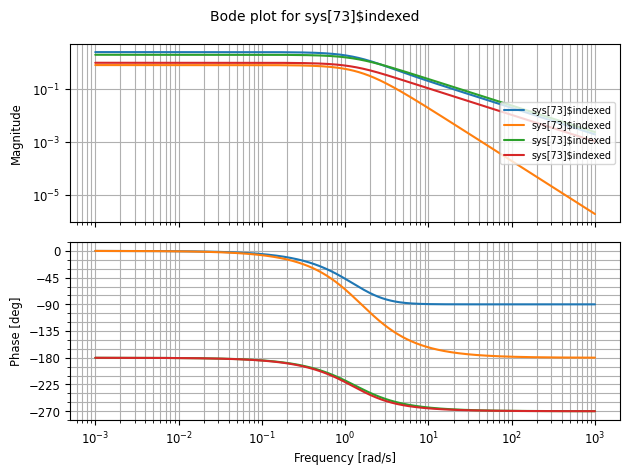

In [148]:
_ = ctrl.bode_plot(sys_for_an_tf_3_2[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_2[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [149]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.564798841962558

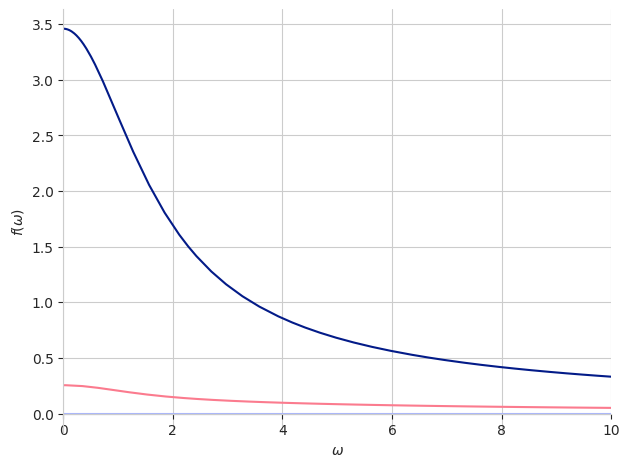

In [150]:
sing = get_singular(sys_for_an_tf_3_2)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [162]:
sys_for_an_3 = ctrl.ss(A+B_2@K_3_3,B_1,C_2+D_2@K_3_3,np.zeros((2,3)))
sys_for_an_tf_3_3 = ctrl.ss2tf(sys_for_an_3)
sys_for_an_tf_3_3

TransferFunction([[array([2.        , 5.76750103]), array([2.]), array([0.])], [array([-2.09449391, -4.18898783]), array([-0.88375052, -2.09449391]), array([0.])]], [[array([1.        , 2.88375052, 2.09449391]), array([1.        , 2.88375052, 2.09449391]), array([1.])], [array([1.        , 2.88375052, 2.09449391]), array([1.        , 2.88375052, 2.09449391]), array([1.])]])

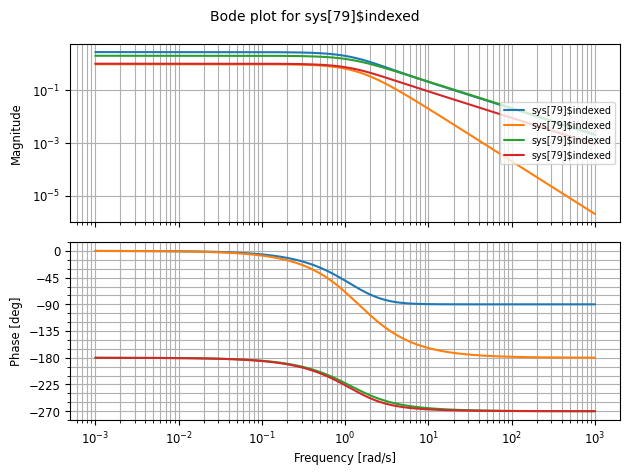

In [152]:
_ = ctrl.bode_plot(sys_for_an_tf_3_3[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf_3_3[1,1],omega=np.arange(10**-3,10**3,10**-4))

In [153]:
g_o = ctrl.gram(sys_for_an_3,"o")
np.sqrt(np.trace(B_1.T@g_o@B_1))

2.5475733681790738

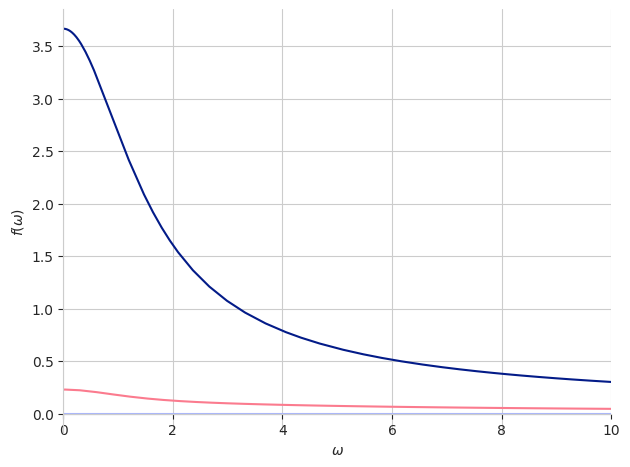

In [154]:
sing = get_singular(sys_for_an_tf_3_3)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

## Task 4

In [207]:
A = np.array([
    [0, 1],
    [0, 0]
])

B_1 = np.array([
    [1, 0, 0],
    [0, 1, 0]
])

B_2 = np.array([
    [0],
    [1]
])

C_1 = np.array([[1, 0]])

C_2 = np.array([
    [1, 0],
    [0, 1]
])

D_1 = np.array([[0, 0, 1]])

D_2 = np.array([
    [0],
    [1]
])

In [208]:
def generate_Hinf_obs(a,b_1,b_2,c_1,c_2,d_1,d_2,gamma):
    R_1 = c_1.T@np.linalg.inv(d_1@d_1.T)@c_1-(gamma**-2)*c_2.T@c_2
    R_2 = b_2@np.linalg.inv(d_2.T@d_2)@b_2.T-(gamma**-2)*b_1@b_1.T
    p = scipy.linalg.solve_continuous_are(a.T,np.identity(R_1.shape[0]),b_1@b_1.T,np.linalg.inv(R_1))
    q = scipy.linalg.solve_continuous_are(a,np.identity(R_2.shape[0]),c_2.T@c_2,np.linalg.inv(R_2))
    if np.max(np.linalg.eig(p@q)[0]) < gamma ** 2:
        l = -p@np.linalg.inv(np.identity(q.shape[0])-(gamma**-2)*q@p)@(c_1+(gamma**-2)*d_1@b_1.T@q).T@np.linalg.inv(d_1@d_1.T)
        k = -np.linalg.inv(d_2.T@d_2)@b_2.T@q
        return k, l, q
    return None

In [238]:
K_4_1, L_4_1, Q_1 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,3.5)

In [239]:
K_4_1

array([[-1.19512195, -1.95411371]])

In [240]:
L_4_1

array([[-8.66857654],
       [-7.87213115]])

In [241]:
np.linalg.eigvals(A+B_2@K_4_1)

array([-0.97705685+0.49038949j, -0.97705685-0.49038949j])

In [242]:
np.linalg.eigvals(A+L_4_1@C_1)

array([-7.63791108, -1.03066546])

In [244]:
K_4_2, L_4_2, Q_2 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,5)

In [245]:
K_4_2

array([[-1.08695652, -1.83177169]])

In [246]:
L_4_2

array([[-2.59456225],
       [-1.83284457]])

In [247]:
np.linalg.eigvals(A+B_2@K_4_2)

array([-0.91588584+0.49810605j, -0.91588584-0.49810605j])

In [248]:
np.linalg.eigvals(A+L_4_2@C_1)

array([-1.29728112+0.3871773j, -1.29728112-0.3871773j])

In [250]:
K_4_3, L_4_3, Q_3 = generate_Hinf_obs(A,B_1,B_2,C_1,C_2,D_1,D_2,10)

In [251]:
K_4_3

array([[-1.02040816, -1.75557659]])

In [252]:
L_4_3

array([[-1.87346467],
       [-1.13430127]])

In [253]:
np.linalg.eigvals(A+B_2@K_4_3)

array([-0.87778829+0.49989587j, -0.87778829-0.49989587j])

In [254]:
np.linalg.eigvals(A+L_4_3@C_1)

array([-0.93673233+0.50678773j, -0.93673233-0.50678773j])

In [259]:
A_new = np.block([
    [A + B_2@K_4_2, -B_2@K_4_2],
    [-(L_4_2@D_1+B_1)*(10**-2)@B_1.T@Q_2, A + L_4_2@C_1 + (L_4_2@D_1+B_1)*(10**-2)@B_1.T@Q_2]
]) 
B_new = np.block([
    [B_1],
    [L_4_2@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_2, -D_2@K_4_2])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [270]:
out = ctrl.forced_response(sys_full,time_1,w,np.ones(4)*10)

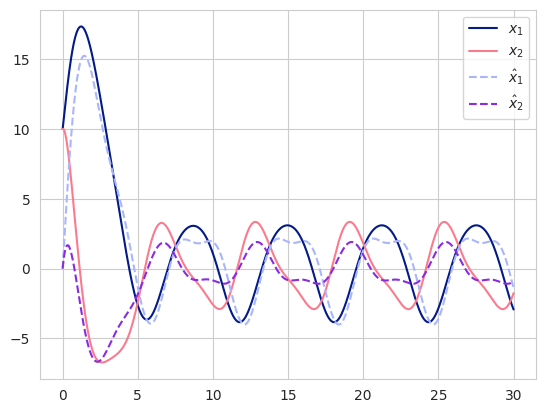

In [271]:
plt.plot(time_1,out.states[0,:],label="$x_1$")
plt.plot(time_1,out.states[1,:],label="$x_2$")
plt.plot(time_1,out.states[0,:]-out.states[2,:],linestyle='--',label="$\hat{x}_1$")
plt.plot(time_1,out.states[1,:]-out.states[3,:],linestyle='--',label="$\hat{x}_2$")
plt.legend()

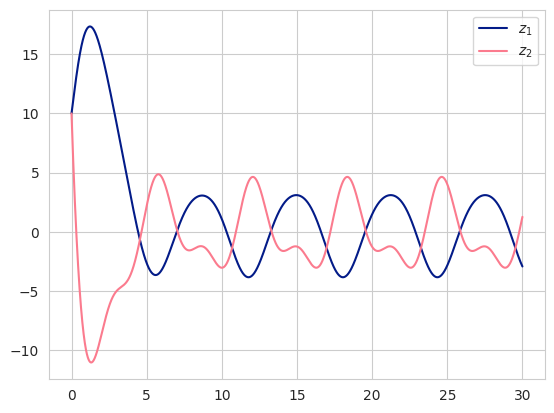

In [272]:
plt.plot(time_1,out.outputs[0,:],label="$z_1$")
plt.plot(time_1,out.outputs[1,:],label="$z_2$")
plt.legend()

In [228]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([ 1.00000000e+00,  4.27640061e+00,  7.29029843e+00, -2.66453526e-15]), array([1.11022302e-16, 1.00000000e+00, 4.27640061e+00, 7.29029843e+00]), array([ 1.86674224e-15, -5.84265435e+00, -1.83062113e+00])], [array([-2.79471871e-16, -5.84265435e+00, -7.67327548e+00, -1.83062113e+00]), array([ 1.        ,  4.27640061,  1.44764408, -1.83062113]), array([-5.84265435e+00, -7.67327548e+00, -1.83062113e+00, -3.46944695e-18])]], [[array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113]), array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113]), array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113])], [array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113]), array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113]), array([1.        , 4.27640061, 7.29029843, 5.84265435, 1.83062113])]])

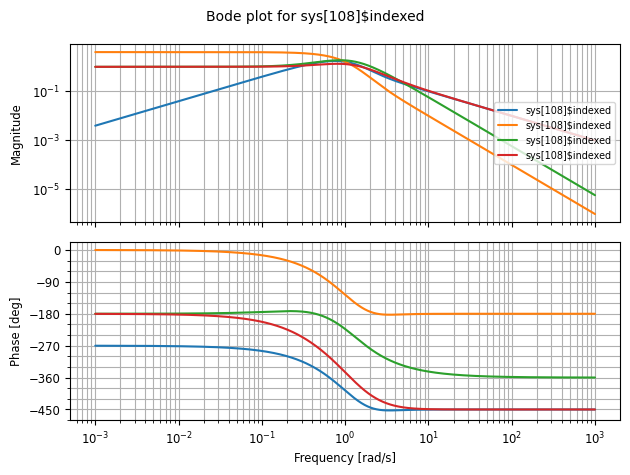

In [229]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

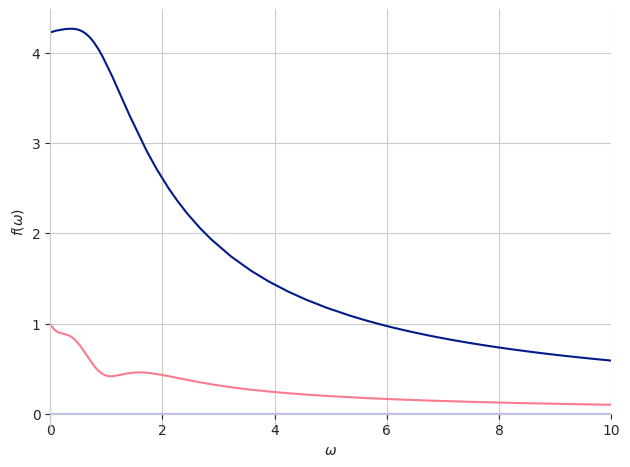

In [230]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [231]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

3.7992608279065534

In [263]:
A_new = np.block([
    [A + B_2@K_4_1, -B_2@K_4_1],
    [-(L_4_1@D_1+B_1)*(10**-2)@B_1.T@Q_1, A + L_4_1@C_1 + (L_4_1@D_1+B_1)*(10**-2)@B_1.T@Q_1]
]) 
B_new = np.block([
    [B_1],
    [L_4_1@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_1, -D_2@K_4_1])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [264]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([ 1.00000000e+00,  1.05836080e+01,  2.58957104e+01, -2.13162821e-14]), array([-1.11022302e-16,  1.00000000e+00,  1.05836080e+01,  2.58957104e+01]), array([-2.12560031e-14, -2.57430455e+01, -9.21999360e+00])], [array([ 3.05775785e-16, -2.57430455e+01, -3.49630391e+01, -9.21999360e+00]), array([ 1.        , 10.58360798,  0.15266494, -9.2199936 ]), array([-2.57430455e+01, -3.49630391e+01, -9.21999360e+00,  2.45359288e-14])]], [[array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ]), array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ]), array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ])], [array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ]), array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ]), array([ 1.        , 10.58360798, 25.89571044, 25.74304549,  9.2199936 ])]])

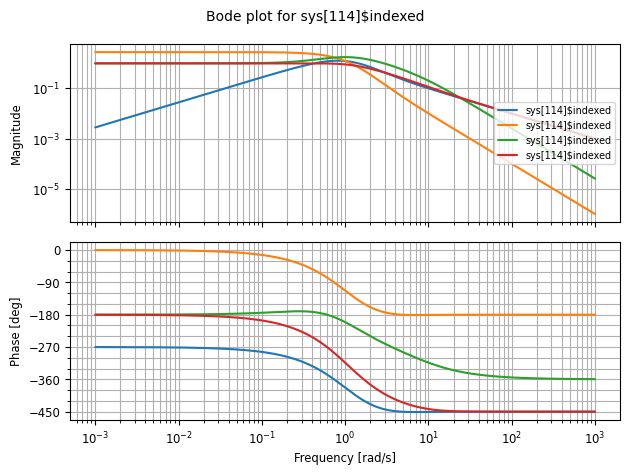

In [257]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

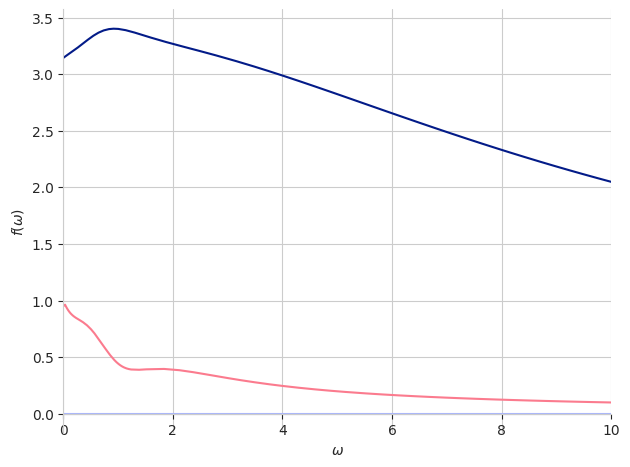

In [258]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [195]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

3.5985208690272

In [268]:
A_new = np.block([
    [A + B_2@K_4_3, -B_2@K_4_3],
    [-(L_4_3@D_1+B_1)*(10**-2)@B_1.T@Q_3, A + L_4_3@C_1 + (L_4_3@D_1+B_1)*(10**-2)@B_1.T@Q_3]
]) 
B_new = np.block([
    [B_1],
    [L_4_3@D_1+B_1]
]) 
C_new = np.block([C_2+D_2@K_4_3, -D_2@K_4_3])
D_new = np.zeros((C_2.shape[0],D_1.shape[1]))
sys_full = ctrl.ss(A_new,B_new,C_new,D_new)

In [269]:
sys_for_an_tf = ctrl.ss2tf(sys_full)
sys_for_an_tf

TransferFunction([[array([ 1.00000000e+00,  3.59392972e+00,  5.39199637e+00, -3.10862447e-15]), array([-1.11022302e-16,  1.00000000e+00,  3.59392972e+00,  5.39199637e+00]), array([-8.84086026e-17, -3.90305139e+00, -1.13430127e+00])], [array([-2.65884177e-16, -3.90305139e+00, -5.03735266e+00, -1.13430127e+00]), array([ 1.        ,  3.59392972,  1.48894498, -1.13430127]), array([-3.90305139e+00, -5.03735266e+00, -1.13430127e+00,  7.63278329e-17])]], [[array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127]), array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127]), array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127])], [array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127]), array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127]), array([1.        , 3.59392972, 5.39199637, 3.90305139, 1.13430127])]])

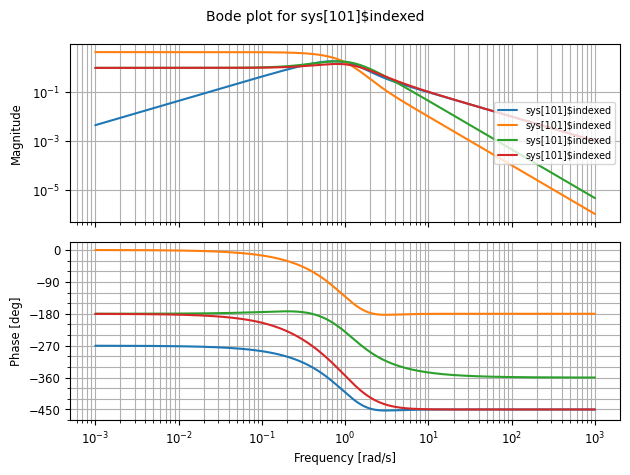

In [198]:
_ = ctrl.bode_plot(sys_for_an_tf[0,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[0,1],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,0],omega=np.arange(10**-3,10**3,10**-4))
_ = ctrl.bode_plot(sys_for_an_tf[1,1],omega=np.arange(10**-3,10**3,10**-4))

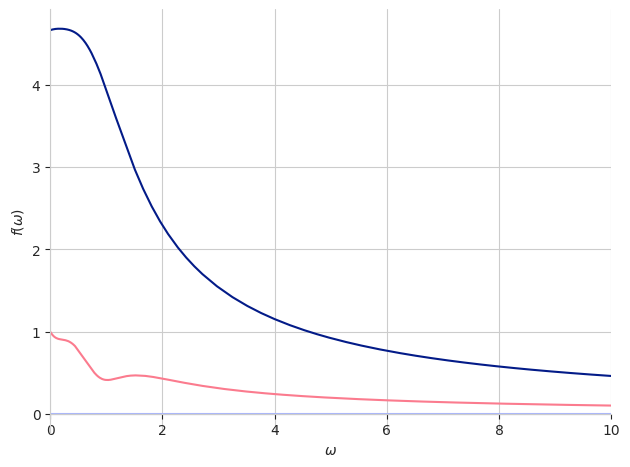

In [199]:
sing = get_singular(sys_for_an_tf)
p = sympy.plotting.plot(sing[0],show=False,xlim=[0,10])
p.append(sympy.plotting.plot(sing[1],show=False,xlim=[0,10])[0])
p.append(sympy.plotting.plot(sing[2],show=False,xlim=[0,10])[0])
p.show()

In [200]:
g_o = ctrl.gram(sys_full,"o")
np.sqrt(np.trace(B_new.T@g_o@B_new))

3.640281687250589